# Анализ графов

In [1]:
import json
import requests
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import community
from collections import Counter
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]

# Данные

Данные из эпизодов Star Wars

http://evelinag.com/blog/2015/12-15-star-wars-social-network/

In [3]:
interactions = json.loads(requests.get('https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json').content)

In [4]:
interactions

{'nodes': [{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'},
  {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'},
  {'name': 'PK-4', 'value': 3, 'colour': '#808080'},
  {'name': 'TC-14', 'value': 4, 'colour': '#808080'},
  {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'},
  {'name': 'DOFINE', 'value': 3, 'colour': '#808080'},
  {'name': 'RUNE', 'value': 10, 'colour': '#808080'},
  {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'},
  {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'},
  {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'},
  {'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'},
  {'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'},
  {'name': 'TARPALS', 'value': 3, 'colour': '#808080'},
  {'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'},
  {'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'},
  {'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'},
  {'name': 'WATTO', 'value': 8, 'colour': '#808080'},
  {'name': 'ANAKIN', 'val

In [7]:
interactions['directed'] = True
interactions['multigraph'] = False
interactions['graph'] = {}

In [8]:
G = json_graph.node_link_graph(interactions)

In [9]:
G

In [10]:
G.number_of_nodes()

110

In [11]:
G.number_of_edges()

398

In [13]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['value']
        print(f'({n}, {nbr}, {wt:.3f} )')
        break
    break

(0, 3, 1.000 )


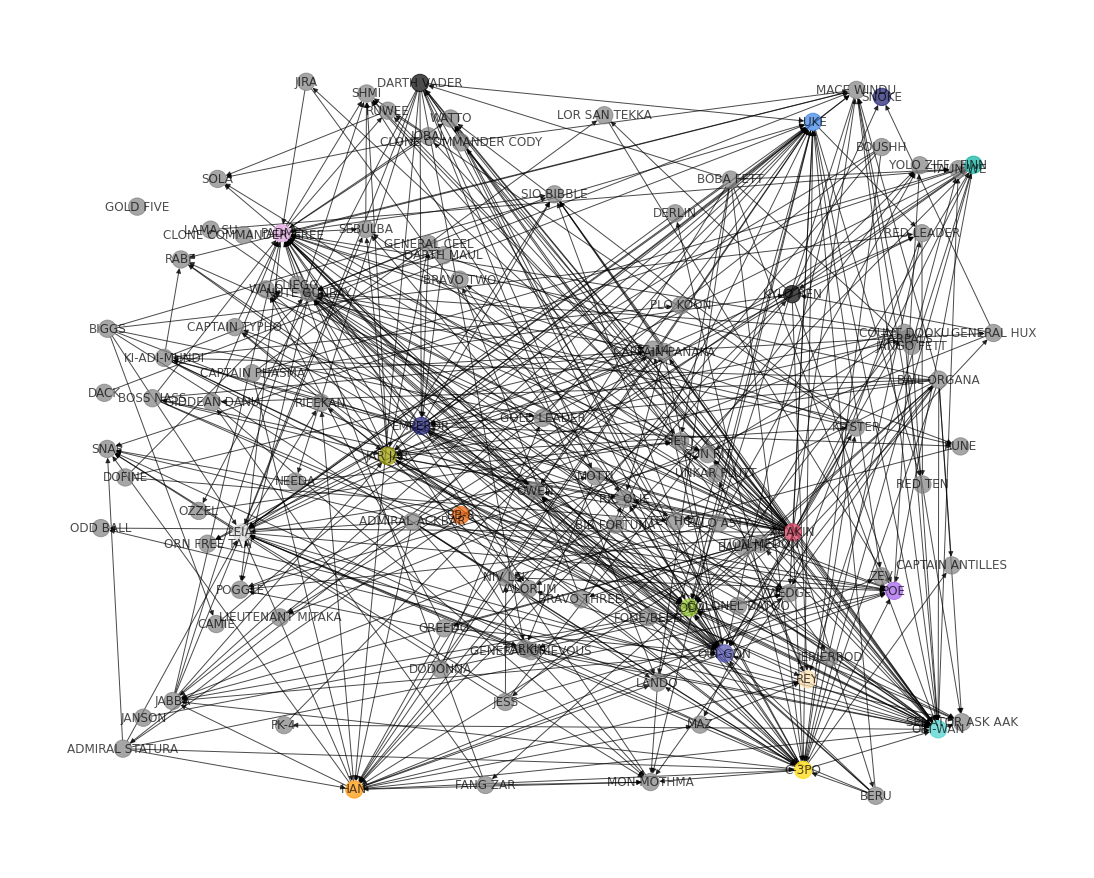

In [19]:
clrs = np.array([n[1]['colour'] for n in G.nodes.data()])
nx.draw_random(G, node_color=clrs, with_labels=True, alpha=.7, labels={n[0]: n[1]['name'] for n in G.nodes.data()})

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.03769851382618966
C-3PO 0.026208207260704715
PADME 0.021777529677631618
LUKE 0.01929882044560944
HAN 0.01892397348564525
QUI-GON 0.016035797884676573
EMPEROR 0.014146090534979422
LEIA 0.010008245284748855
JAR JAR 0.009814484464076718
JABBA 0.007007548177272949


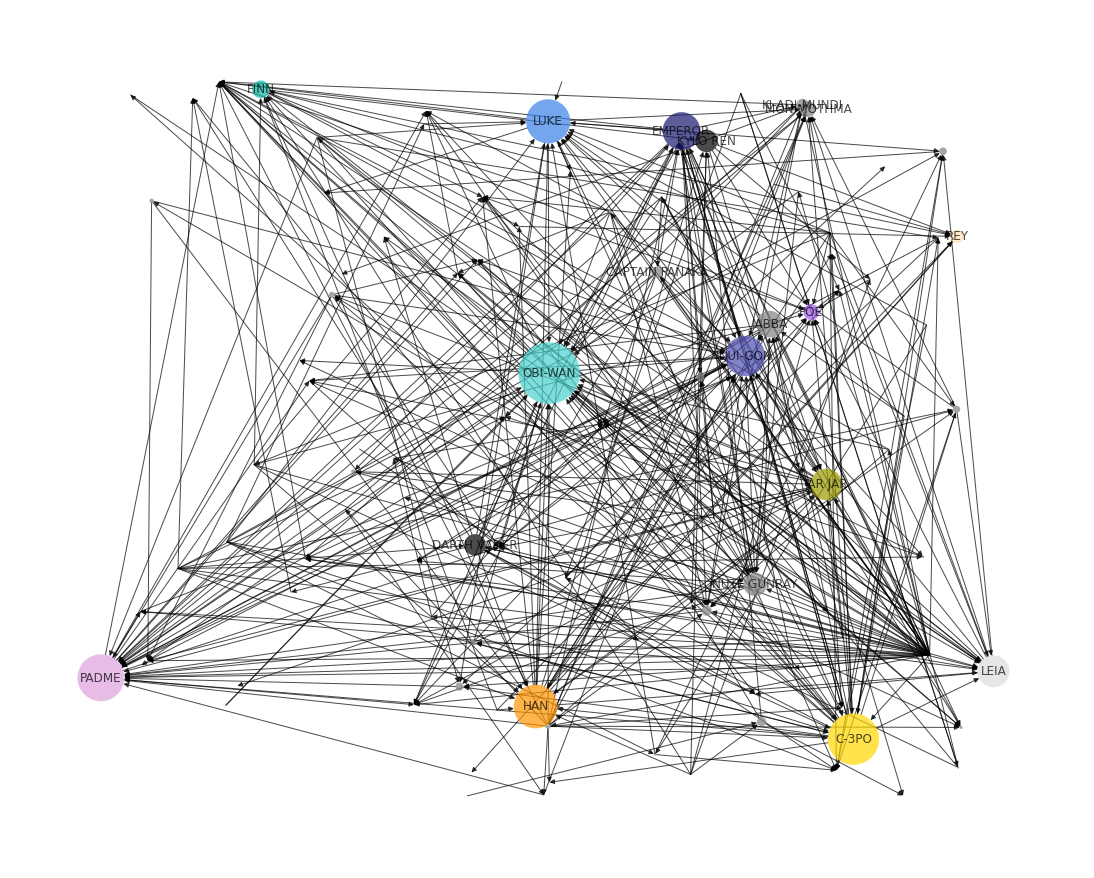

In [24]:
th = betweenness_centrality_counts.most_common(20)[-1][1]
nx.draw_random(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if betweenness_centrality[n[0]] > th},
    node_size=np.array(list(betweenness_centrality.values())) * 100000,
    linewidths=.1,
)

In [27]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

ANAKIN 0.3761467889908257
OBI-WAN 0.3211009174311927
PADME 0.30275229357798167
C-3PO 0.30275229357798167
QUI-GON 0.23853211009174313
JAR JAR 0.22018348623853212
LUKE 0.22018348623853212
HAN 0.21100917431192662
EMPEROR 0.2018348623853211
LEIA 0.1926605504587156


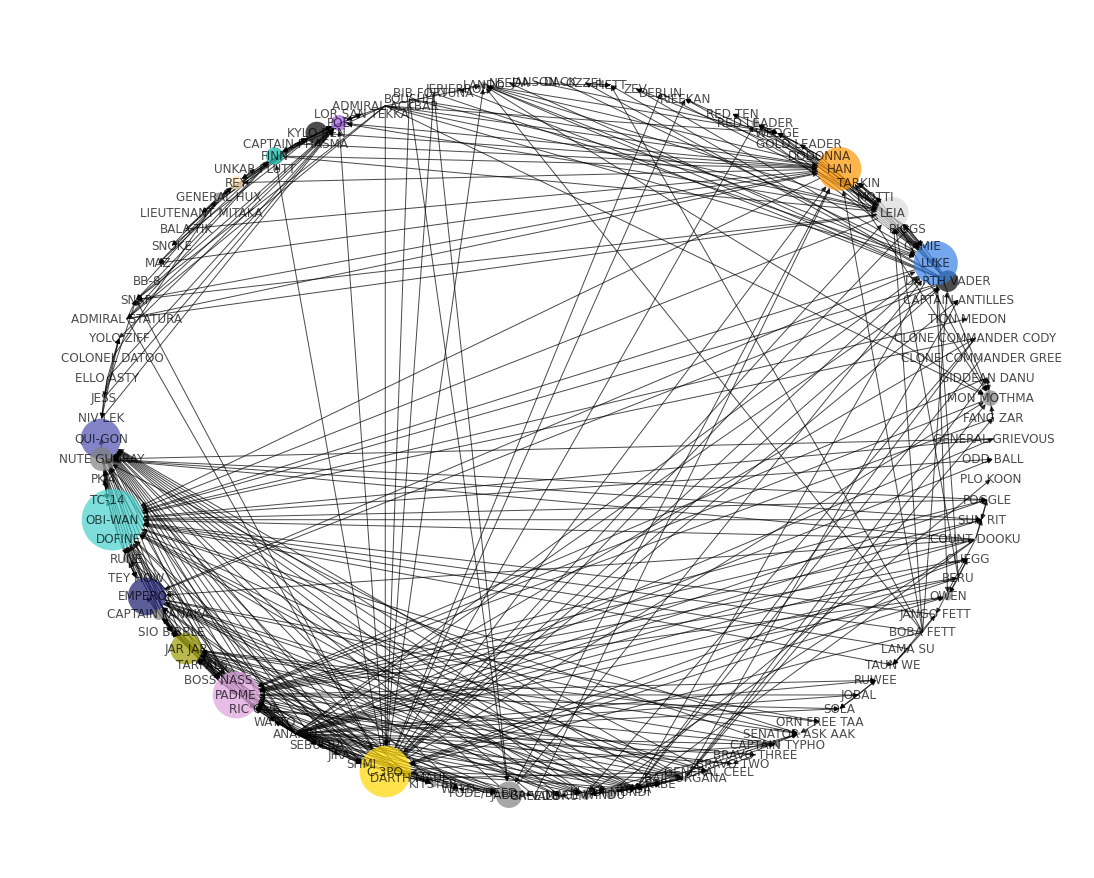

In [28]:
 nx.draw_shell(
    G,
    node_color=clrs,
    with_labels=True,
    alpha=.7,
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th},
    node_size=np.array(list(betweenness_centrality.values())) * 100000,
    linewidths=.1,
 )